# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 16

Group Members:
- Thea Josephine Halim (13522012)
- Debrina Veisha Rashika W (13522035)
- Melati Anggraini (13522035)
- Raffael Boymian Siahaan (13522046)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

## Import Dataset

### Train data

In [46]:
time = pd.read_csv('https://drive.google.com/uc?id=1fi0HrsJpRz0yVpIKUkDMHRYTSfc3UmDN')
label = pd.read_csv('https://drive.google.com/uc?id=1Fj-khY1a7rNA_QJrQgIzv6zCfvpH46CM')
flow = pd.read_csv('https://drive.google.com/uc?id=1gZ19osGydA-nEqa-PjKMekEo8taIaRPr')
content = pd.read_csv('https://drive.google.com/uc?id=1NIAqNCTvlcWUwwmFW3O6oDNTCuaJ-nF7')
additional = pd.read_csv('https://drive.google.com/uc?id=18ABP-0Rbt9iqMeTf8SfARo1Gz6zG_prz')
basic = pd.read_csv('https://drive.google.com/uc?id=1SgZN5cnjyQAlM3qYTowQkG7VrlIlnlR1')

df_train = time.merge(basic, on='id', how='outer') \
          .merge(flow, on='id', how='outer') \
          .merge(content, on='id', how='outer') \
          .merge(additional, on='id', how='outer') \
          .merge(label, on='id', how='outer')

df_train.head()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,state,dur,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,label
0,4449.110313,3234.831566,11.845558,6.261361,NaN,0.000444,0.000114,0,FIN,2.736664,...,0.0,11.0,NaN,5.0,4.0,2.0,1.0,5.0,Normal,0
1,0.000000,0.000000,0.009000,0.000000,0.000000,0.000000,NaN,1,INT,0.000009,...,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,Generic,1
2,8561.040438,249.950547,165.386453,172.345750,0.158826,0.057902,0.100924,2,FIN,5.788526,...,0.0,4.0,4.0,2.0,2.0,1.0,1.0,4.0,Exploits,1
3,4053.086020,2918.730804,8.669644,4.496707,0.000558,0.000448,NaN,3,FIN,3.849634,...,0.0,9.0,9.0,3.0,2.0,2.0,1.0,6.0,Normal,0
4,0.000000,0.000000,0.008000,0.007000,0.000000,0.000000,0.000000,4,CON,0.001052,...,0.0,3.0,3.0,4.0,3.0,1.0,NaN,1.0,Normal,0


### Test Data

In [ ]:
time = pd.read_csv('https://drive.google.com/uc?id=1p7AFNpi_rogEOxFENnzqrJ8axgT8HOkc')
flow = pd.read_csv('https://drive.google.com/uc?id=1eJ7_Iq4vHcBcSVlng9ST6isCl49RcP7l')
content = pd.read_csv('https://drive.google.com/uc?id=1xlT_Dl28EBS29d_gnATGXYLqteo9VY4O')
additional = pd.read_csv('https://drive.google.com/uc?id=1z_e8SVoM0T3NVpOi_uH-3sBjB0E6WNge')
basic = pd.read_csv('https://drive.google.com/uc?id=1REFXb0yWdlweu9CnvSgEWBPRMoG0K4FE')

df_test = time.merge(basic, on='id', how='outer') \
          .merge(flow, on='id', how='outer') \
          .merge(content, on='id', how='outer') \
          .merge(additional, on='id', how='outer')

df_test.head()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,state,dur,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116,0,FIN,0.454980,...,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,1.0,2.0
1,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356,1,FIN,0.648037,...,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,1.0,5.0
2,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691,2,FIN,1.120856,...,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,1.0,4.0
3,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,3,INT,0.000001,...,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,1.0,4.0
4,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129,4,FIN,0.264763,...,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,1.0,7.0


### Split data to categorical and numerical

In [47]:
df_train_num = df_train.select_dtypes(include=['number'])
df_train_cat = df_train.select_dtypes(include=['object', 'category'])

In [ ]:
import pandas as pd

sampled_df = df_train.groupby('attack_cat').apply(lambda x: x.sample(n=4000, random_state=42) if len(x) >= 3000 else x)

df_train = sampled_df.reset_index(drop=True)
float_columns = df_train.select_dtypes(include=['float64']).columns

print(df_train.head())


         sjit        djit      sinpkt    dinpkt    tcprtt    synack    ackdat  \
0  403.300313    0.000000  333.854969   0.00000  0.000000  0.000000  0.000000   
1    0.000000    0.000000    0.003000   0.00000  0.000000  0.000000  0.000000   
2    0.000000    0.000000         NaN   0.00000  0.000000  0.000000  0.000000   
3         NaN  126.949922   62.205333  69.09657  0.099577  0.057906  0.041671   
4    0.000000    0.000000    0.007000   0.00000  0.000000  0.000000  0.000000   

    id state        dur  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst  ct_dst_ltm  \
0   66   INT  59.760056  ...         0.0         1.0         1.0         2.0   
1  116   INT   0.000003  ...         0.0         1.0         1.0         1.0   
2  150   INT   0.000009  ...         0.0         6.0         6.0         2.0   
3  261   FIN   0.559848  ...         0.0         2.0         2.0         1.0   
4  297   INT   0.000007  ...         0.0         NaN         5.0         2.0   

   ct_src_ltm  ct_src_dport_ltm 

<ipython-input-5-57f11e1f5a71>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df_train.groupby('attack_cat').apply(lambda x: x.sample(n=4000, random_state=42) if len(x) >= 3000 else x)


### Save Test Data Id

In [ ]:
test_id = df_test['id']
df_train = df_train.drop(columns=['label'])

# 1. Exploratory Data Analysis

## A. Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### The size of data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sjit               166603 non-null  float64
 1   djit               166495 non-null  float64
 2   sinpkt             166634 non-null  float64
 3   dinpkt             166607 non-null  float64
 4   tcprtt             166505 non-null  float64
 5   synack             166605 non-null  float64
 6   ackdat             166746 non-null  float64
 7   id                 175341 non-null  int64  
 8   state              166536 non-null  object 
 9   dur                166619 non-null  float64
 10  sbytes             166780 non-null  float64
 11  dbytes             166472 non-null  float64
 12  sttl               166516 non-null  float64
 13  dttl               166687 non-null  float64
 14  sloss              166547 non-null  float64
 15  dloss              166363 non-null  float64
 16  se

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20583 entries, 0 to 20582
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sjit               19587 non-null  float64
 1   djit               19525 non-null  float64
 2   sinpkt             19584 non-null  float64
 3   dinpkt             19560 non-null  float64
 4   tcprtt             19549 non-null  float64
 5   synack             19571 non-null  float64
 6   ackdat             19536 non-null  float64
 7   id                 20583 non-null  int64  
 8   state              19538 non-null  object 
 9   dur                19568 non-null  float64
 10  sbytes             19562 non-null  float64
 11  dbytes             19569 non-null  float64
 12  sttl               19620 non-null  float64
 13  dttl               19555 non-null  float64
 14  sloss              19570 non-null  float64
 15  dloss              19610 non-null  float64
 16  service            195

From the information above we know that the data contains **44 columns and 175341 rows**

### Data Types

In [ ]:
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sjit               166603 non-null  float64
 1   djit               166495 non-null  float64
 2   sinpkt             166634 non-null  float64
 3   dinpkt             166607 non-null  float64
 4   tcprtt             166505 non-null  float64
 5   synack             166605 non-null  float64
 6   ackdat             166746 non-null  float64
 7   id                 175341 non-null  int64  
 8   dur                166619 non-null  float64
 9   sbytes             166780 non-null  float64
 10  dbytes             166472 non-null  float64
 11  sttl               166516 non-null  float64
 12  dttl               166687 non-null  float64
 13  sloss              166547 non-null  float64
 14  dloss              166363 non-null  float64
 15  sload              166555 non-null  float64
 16  dl

In [ ]:
df_train_num.describe()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,dur,sbytes,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
count,1.666030e+05,166495.000000,166634.000000,166607.000000,166505.000000,166605.000000,166746.000000,175341.000000,166619.000000,1.667800e+05,...,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,166553.000000,166446.000000,175341.000000
mean,4.993982e+03,604.891720,987.360974,87.763617,0.041331,0.021042,0.020402,87670.000000,1.359299,8.734079e+03,...,0.014974,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,4.198363,8.731000,0.680622
std,4.506783e+04,4082.439167,7246.462797,987.040024,0.079428,0.043560,0.040619,50616.731112,6.485386,1.712289e+05,...,0.126338,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,5.775348,10.956486,0.466237
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000e+01,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000e+00,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,43835.000000,0.000008,1.140000e+02,...,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,0.000000e+00,0.000000,0.284723,0.006000,0.000000,0.000000,0.000000,87670.000000,0.001548,4.500000e+02,...,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000,1.000000
75%,2.511184e+03,114.753348,55.205806,50.933127,0.065151,0.023235,0.038951,131505.000000,0.667311,1.418000e+03,...,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000,1.000000
max,1.460480e+06,289388.269700,84371.496000,56716.824000,2.518893,2.100352,1.520884,175340.000000,59.999989,1.296523e+07,...,4.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000,1.000000


From the information above, we observe that the numerical data contains 37 columns with two types of data, integers and floats:

*   **Integer**: id, label
*   **Float**: sbytes, dbytes, sttl, dttl, sloss, dloss, spkts, dpkts, swin, dwin, stcpb, dtcpn, smean, dmean, trans_depth, response_body_len, ct_state_ttl, ct_flw_http_mthd, ct_ftp_cmd, ct_srv_src, ct_srv_dst, ct_dst_ltm, ct_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, ct_dst_src_ltm, sjid, djit, sinpkt, dinpkt, tcprtt, synack, ackdat, dur, sload, dload, is_sm_ips_ports, is_ftp_login


In [ ]:
df_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   state       166536 non-null  object
 1   service     166550 non-null  object
 2   proto       166515 non-null  object
 3   attack_cat  175341 non-null  object
dtypes: object(4)
memory usage: 5.4+ MB


In [ ]:
df_train_cat.describe()

,state,service,proto,attack_cat
count,166536,166550,166515,175341
unique,9,13,133,10
top,INT,-,tcp,Normal
freq,78148,89434,75902,56000


From the information above, we observe that the categorical data contains 4 columns with state have 9 unique value, service have 13 unique value, proto have 133 unique value, and attack_cat have 10 unique value.

### Summary of the DataFrame

- The dataset contains a total of **175,340 entries** and **44 columns**, detailing various aspects related to **label**.

- The dataset comprises a mix of data types, including:
  - **Integer**: Includes columns like `id`.
  - **Float**: Includes fields like `sbytes`, `dbytes`, `sttl`, `dttl`, `sloss`, `dloss`, `spkts`, `dpkts`, `swin`, `dwin`, `stcpb`, `dtcpn`, `smean`, `dmean`, `trans_depth`, `response_body_len`, `ct_state_ttl`, `ct_flw_http_mthd`, `ct_ftp_cmd`, `ct_srv_src`, `ct_srv_dst`, `ct_dst_ltm`, `ct_src_ltm`, `ct_src_dport_ltm`, `ct_dst_sport_ltm`, `ct_dst_src_ltm`,  `sjid`, `djit`, `sinpkt`, `dinpkt`, `tcprtt`, `synack`, `ackdat`, `dur`, `sload`, and `dload`.
  - **Object**: For categorical data like `state`, `service`, `proto`, and `attack_cat`
  - **Binary**: For columns such as `label`, `is_sm_ips_ports`, and `is_ftp_login`

- The data includes **9 unique values for `state`**, **13 unique values for `service`**, **133 unique values for `proto`** , and **10 unique values for `attack_cat`** .

- Upon inspecting the numerical data, there are no unusual values, and everything appears normal, with minimum values all being non-negative.

### Missing Values

In [ ]:
missing_values = df_train.isnull().sum()
print("Missing values for each features in train data:\n", missing_values)

Missing values for each features in train data:
 sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
id                      0
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
proto                8826
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst     

The dataset has missing values across multiple features, with each column containing approximately 8000 missing entries. During the preprocessing stage, we will identify these variables and apply appropriate techniques to handle the missing values.

### Duplicate Data

In [ ]:
num_duplicates = df_train.duplicated().sum()
print(f"Duplicate Data: {num_duplicates}")

Duplicate Data: 0


### Outliers for Each Feature

In [ ]:
def detect_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df < lower_bound) | (df > upper_bound)]

    print("Lower bound: ", lower_bound)
    print("Upper bound: ", upper_bound)
    print("Number of Outliers: ", len(outliers))

    return lower_bound, upper_bound

In [ ]:
numerical_features = df_train_num.columns
for feature in numerical_features:
    print("\nFeature:", feature)
    detect_outliers(df_train_num[feature])


Feature: sjit
Lower bound:  -3766.7759482500005
Upper bound:  6277.959913750001
Number of Outliers:  17146

Feature: djit
Lower bound:  -172.130022
Upper bound:  286.88337
Number of Outliers:  19538

Feature: sinpkt
Lower bound:  -82.788708625
Upper bound:  138.00251437499998
Number of Outliers:  14034

Feature: dinpkt
Lower bound:  -76.39969049999999
Upper bound:  127.33281749999999
Number of Outliers:  13409

Feature: tcprtt
Lower bound:  -0.0977265
Upper bound:  0.1628775
Number of Outliers:  15228

Feature: synack
Lower bound:  -0.034852499999999995
Upper bound:  0.05808749999999999
Number of Outliers:  29934

Feature: ackdat
Lower bound:  -0.0584265
Upper bound:  0.0973775
Number of Outliers:  7878

Feature: id
Lower bound:  -87670.0
Upper bound:  263010.0
Number of Outliers:  0

Feature: dur
Lower bound:  -1.00094575
Upper bound:  1.66826425
Number of Outliers:  14968

Feature: sbytes
Lower bound:  -1842.0
Upper bound:  3374.0
Number of Outliers:  21760

Feature: dbytes
Lower bo

### Correlations between features

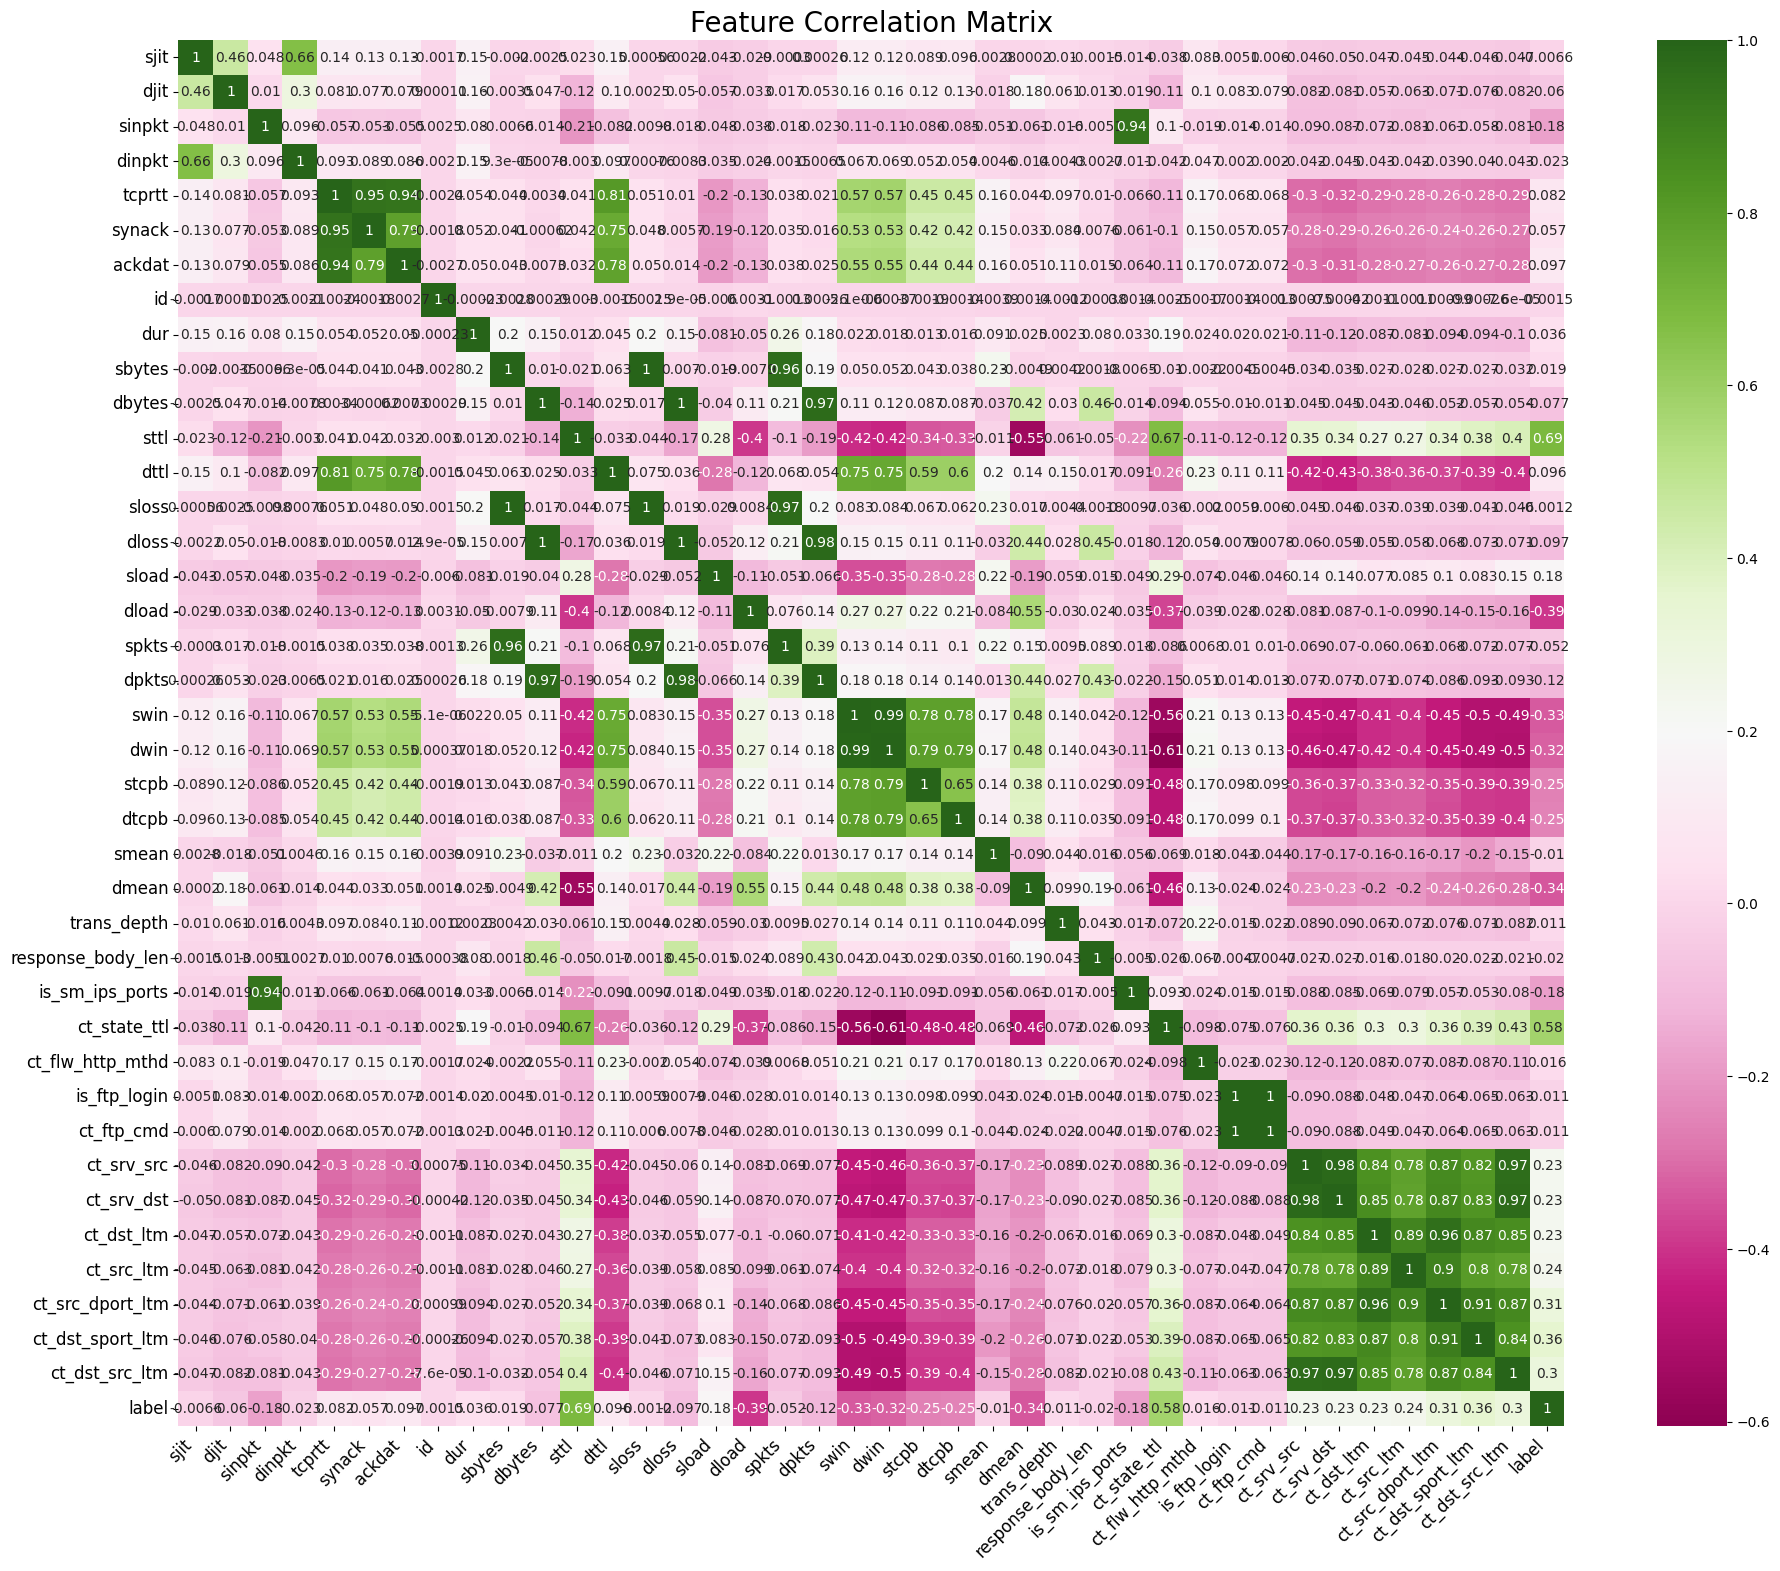

In [ ]:
correlation_matrix = df_train_num.corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', square=True, annot_kws={"size": 10})
plt.title("Feature Correlation Matrix", fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
df_train_num.corr()

,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat,id,dur,sbytes,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,label
sjit,1.000000,0.460265,0.048367,0.664362,0.138546,0.132801,0.129486,-0.001749,0.148292,-0.002042,...,0.005085,0.006009,-0.045601,-0.049876,-0.046785,-0.045041,-0.044040,-0.045666,-0.047454,-0.006631
djit,0.460265,1.000000,0.010142,0.296775,0.081234,0.076735,0.079416,0.000107,0.157505,-0.003493,...,0.082648,0.079407,-0.081666,-0.081089,-0.056824,-0.062575,-0.071223,-0.075892,-0.081533,-0.060026
sinpkt,0.048367,0.010142,1.000000,0.095543,-0.056694,-0.052588,-0.055017,0.002496,0.079994,-0.006632,...,-0.014384,-0.014478,-0.090113,-0.087319,-0.072049,-0.081309,-0.061102,-0.057769,-0.081389,-0.176127
dinpkt,0.664362,0.296775,0.095543,1.000000,0.092509,0.088871,0.086085,-0.002139,0.153865,0.000093,...,0.001992,0.002036,-0.042390,-0.045295,-0.042717,-0.042205,-0.038635,-0.039612,-0.042924,-0.022534
tcprtt,0.138546,0.081234,-0.056694,0.092509,1.000000,0.948882,0.941391,-0.002374,0.054290,0.043775,...,0.068068,0.067564,-0.301684,-0.316313,-0.286305,-0.278263,-0.264175,-0.279442,-0.290443,0.081516
synack,0.132801,0.076735,-0.052588,0.088871,0.948882,1.000000,0.786561,-0.001769,0.052004,0.040632,...,0.057015,0.057001,-0.275279,-0.289530,-0.264306,-0.257473,-0.243742,-0.259282,-0.266942,0.057363
ackdat,0.129486,0.079416,-0.055017,0.086085,0.941391,0.786561,1.000000,-0.002675,0.050365,0.043277,...,0.071702,0.071685,-0.296122,-0.310101,-0.278000,-0.269658,-0.256283,-0.269742,-0.284228,0.096586
id,-0.001749,0.000107,0.002496,-0.002139,-0.002374,-0.001769,-0.002675,1.000000,-0.000230,-0.002813,...,-0.001380,-0.001294,0.000748,-0.000422,-0.001102,-0.001136,0.000992,-0.000260,-0.000076,-0.001545
dur,0.148292,0.157505,0.079994,0.153865,0.054290,0.052004,0.050365,-0.000230,1.000000,0.202774,...,0.019927,0.020908,-0.113574,-0.115411,-0.086758,-0.081485,-0.094007,-0.093780,-0.101684,0.036047
sbytes,-0.002042,-0.003493,-0.006632,0.000093,0.043775,0.040632,0.043277,-0.002813,0.202774,1.000000,...,-0.004481,-0.004513,-0.034231,-0.034776,-0.026692,-0.027559,-0.026761,-0.027446,-0.032233,0.018521


### Categorical Feature Distribution

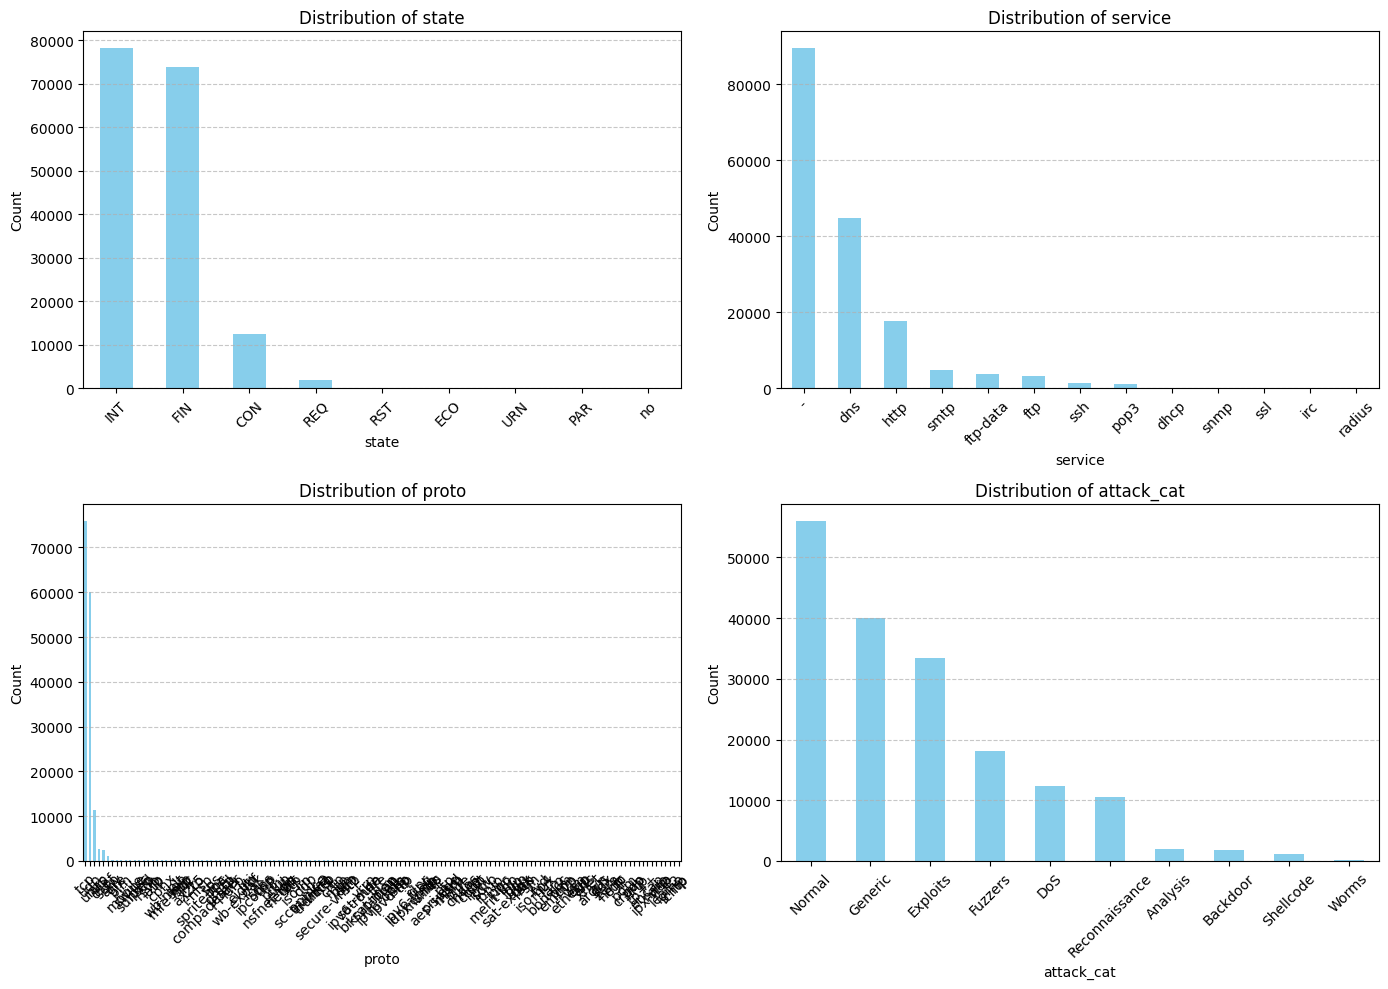

In [ ]:
num_cols = 2
num_plots = len(df_train_cat.columns)
num_rows = (num_plots + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(df_train_cat.columns):
    counts = df_train_cat[col].value_counts()
    counts.plot(kind='bar', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Continues Data Distribution

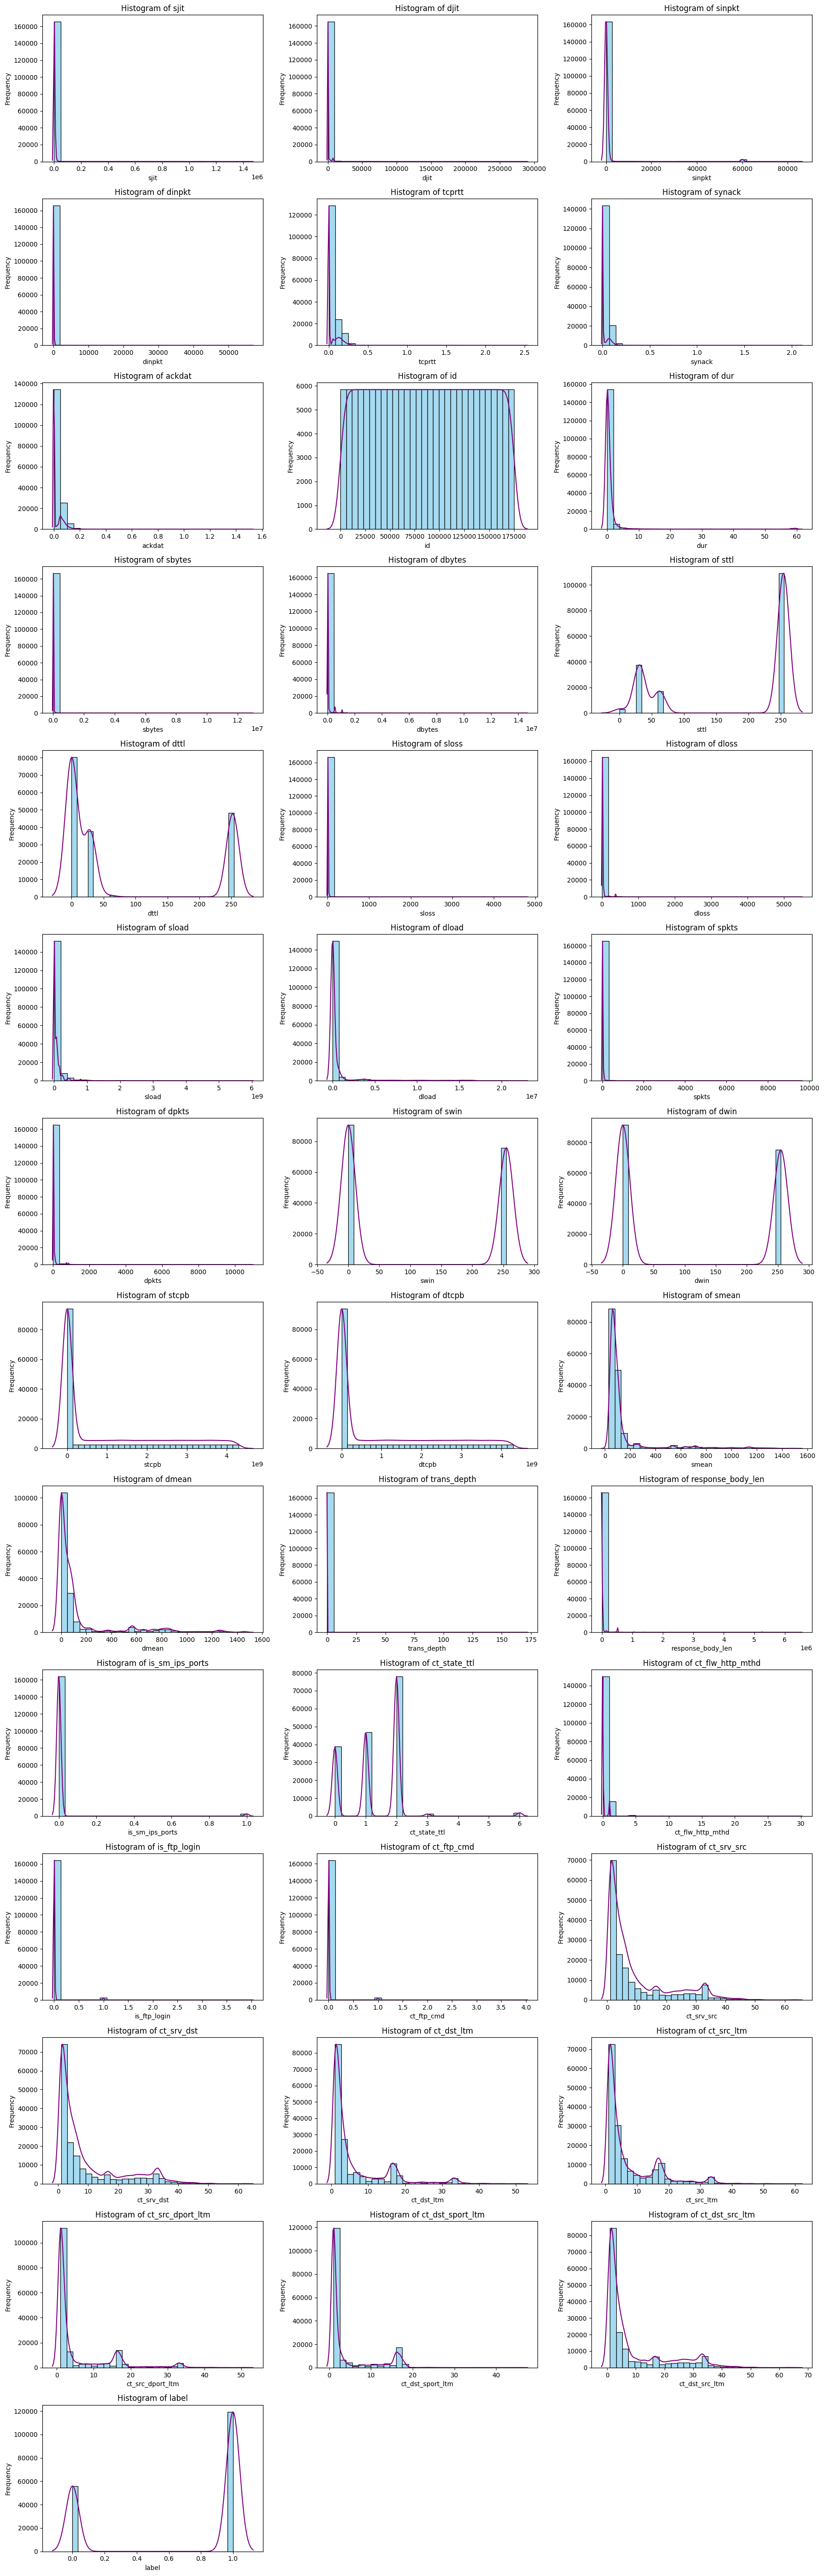

In [ ]:
n_cols = 3
n_rows = (len(df_train_num.columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()


for i, col in enumerate(df_train_num.columns):
    sns.histplot(df_train_num[col], bins=30, kde=False, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    ax_inset = axes[i].twinx()
    sns.kdeplot(df_train_num[col], color='purple', ax=ax_inset)
    ax_inset.get_yaxis().set_visible(False)
    ax_inset.set_ylabel('Density', color='purple')


for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Correlation Between Features and Target

Index(['sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'id',
       'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload',
       'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'label'],
      dtype='object')


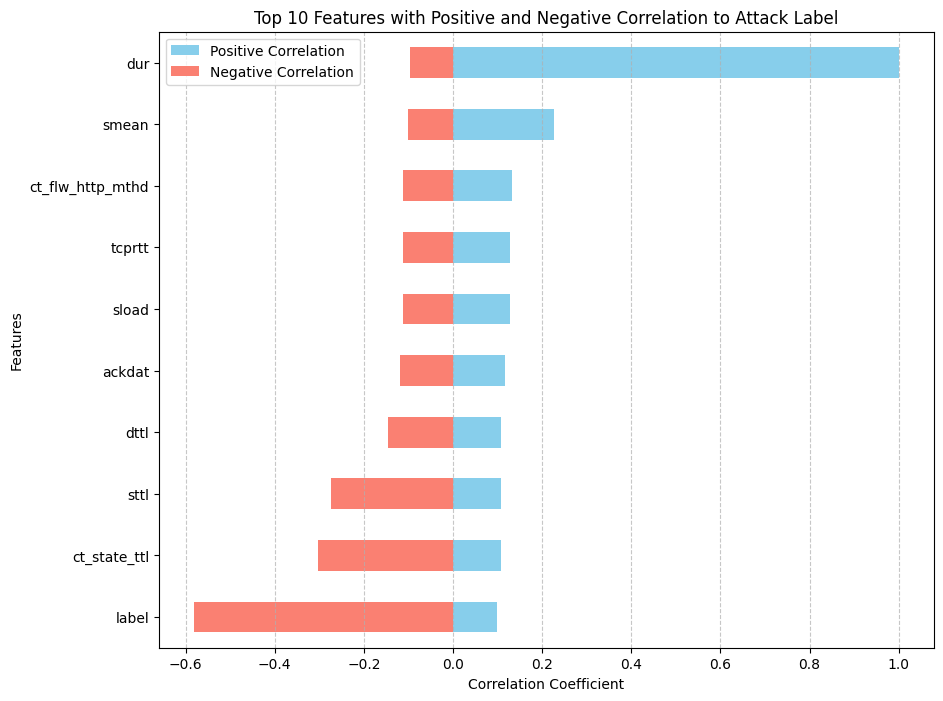

In [48]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

label_encoder = LabelEncoder()
print(df_train_num.columns)
df_train_num['attack_cat'] = label_encoder.fit_transform(df_train['attack_cat'])

correlation_matrix = df_train_num.corr()

correlations_with_target = correlation_matrix['attack_cat'].sort_values()

top_positive = correlations_with_target.tail(10)
top_negative = correlations_with_target.head(10)

df_train_num.drop(columns=['attack_cat'], inplace=True)

plt.figure(figsize=(10, 8))
top_positive.plot(kind='barh', color='skyblue', label='Positive Correlation')
top_negative.plot(kind='barh', color='salmon', label='Negative Correlation')

plt.title("Top 10 Features with Positive and Negative Correlation to Attack Label")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
def cramers(x, y):
    matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(matrix)[0]
    n = matrix.sum().sum()
    r, k = matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

<Figure size 1000x800 with 0 Axes>

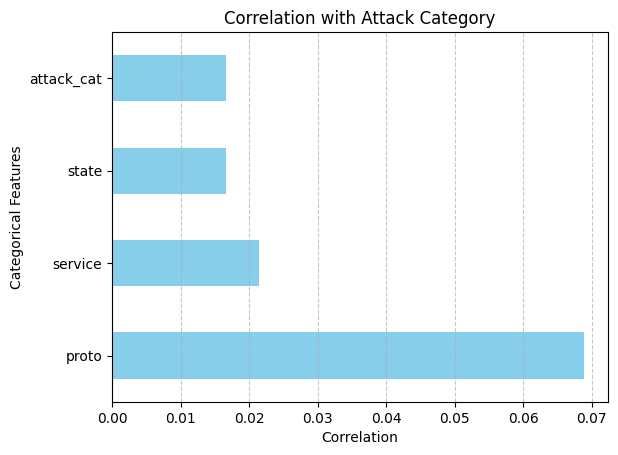

In [ ]:
values = {}
for col in df_train_cat.columns:
    values[col] = cramers(df_train_cat[col], df_train['attack_cat'])
cramers_df = pd.DataFrame.from_dict(values, orient='index', columns=['Value'])

plt.figure(figsize=(10, 8))
cramers_df.sort_values(by='Value', ascending=False).plot(kind='barh', legend=False, color='skyblue')
plt.title("Correlation with Attack Category")
plt.xlabel("Correlation")
plt.ylabel("Categorical Features")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# 2. Data Cleaning and Preprocessing



## A. Data Cleaning and Preprocessing

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Feature Scaling

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaling_method='z-score'):
        self.scaling_method = scaling_method
        self.scaler = None

    def fit(self, X, y=None):
        self.numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

        if self.scaling_method == 'min-max':
            self.scaler = MinMaxScaler()
        elif self.scaling_method == 'z-score':
            self.scaler = StandardScaler()
        else:
            raise ValueError("Unsupported scaling method. Use 'min-max' or 'z-score'.")

        self.scaler.fit(X[self.numerical_cols])
        return self

    def transform(self, X):
        X = X.copy()

        if self.scaler:
            X[self.numerical_cols] = self.scaler.transform(X[self.numerical_cols])

        return X

The FeatureScaler class is designed to scale numerical features in a dataset. It provides two scaling methods:

1. Z-Score Scaling: Standardizes numerical features by subtracting the mean and dividing by the standard deviation. This ensures the data has a mean of 0 and a standard deviation of 1, making it suitable for datasets with outliers or normally distributed features.

2. Min-Max Scaling: Normalizes numerical features to a range between 0 and 1, which is ideal for ensuring consistent feature ranges, especially for algorithms sensitive to magnitude differences.

The class automatically identifies numerical columns and applies the selected scaling method, ensuring consistent preprocessing for improved model training and performance.

### II. Feature Encoding


In [ ]:
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        self.cat_cols = X.select_dtypes(include=['object']).columns.difference(['attack_cat'])
        return self

    def transform(self, X):
        X_encoded = X.copy()

        for col in self.cat_cols:
            one_hot = pd.get_dummies(X_encoded[col], prefix=col)
            X_encoded = pd.concat([X_encoded, one_hot], axis=1)

            X_encoded.drop(col, axis=1, inplace=True)

        return X_encoded


All **categorical data** was encoded because there was **no inherent order** among the categories. This step ensured that the model could interpret the categorical features correctly without assuming any ordinal relationships.

### III. Feature Imputer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class FeatureImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        for col in ['sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'dur', 'sbytes', 'dbytes',
            'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts',
            'swin', 'dwin', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len',
            'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
            'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
            'ct_dst_src_ltm']:
            imputer = SimpleImputer(strategy='mean')
            X[col] = imputer.fit_transform(X[[col]])

        X['state'] = X['state'].fillna('INT')
        X['proto'] = X['proto'].fillna('-')
        X['service'] = X['service'].fillna('tcp')

        null_columns = X.columns[X.isnull().any()]
        print(X[null_columns].isnull().sum())

        return X



The FeatureImputer class is designed to handle missing data in the dataset. It imputes numerical columns using the mean value, ensuring the data distribution remains consistent. Categorical columns are filled with their most frequent value to retain common patterns in the data. This preprocessing step ensures the dataset is clean and complete, which is crucial for reliable analysis and model performance.

### IV. Feature Creator


In [ ]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureCreator(BaseEstimator, TransformerMixin):
    def __init__(self, bin_features=None, n_bins=10):
        self.bin_features = bin_features
        self.n_bins = n_bins

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.bin_features is None:
            self.bin_features = X.select_dtypes(include=[np.float64]).columns.tolist()

        for feature in self.bin_features:
            X[feature] = pd.cut(X[feature], bins=self.n_bins, labels=False, include_lowest=True)

        return X


All numerical data was **binned into 10 intervals** (bins). This process converted continuous features into discrete categories, making it easier during modeling. Binning helps simplify the data and can sometimes improve model performance by reducing noise and capturing patterns more effectively.

### V. Drop Features

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        columns_to_keep = [
            'dur', 'smean', 'ct_flw_http_mthd', 'tcprtt', 'sload',
            'ackdat', 'dtti', 'stti', 'ct_state_tti', 'state',
            'attack_cat'
        ]

        # Memilih hanya kolom yang ada dalam X dan termasuk dalam columns_to_keep
        X = X[[col for col in columns_to_keep if col in X.columns]]


        return X

Several columns were dropped during preprocessing because they had very low accuracy contributions or negatively impacted the performance of the model. By reducing the number of features, the model became more efficient and less prone to overfitting.

### VI. FeatureInteraction

In [ ]:

class FeatureInteraction(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if all(col in X.columns for col in ['sload', 'dload']):
            X['sload_dload_ratio'] = X['sload'] / (X['dload'] + 1e-5)
        if all(col in X.columns for col in ['sbytes', 'dbytes']):
            X['sbytes_dbytes_ratio'] = X['sbytes'] / (X['dbytes'] + 1e-5)
        if all(col in X.columns for col in ['smean', 'dmean']):
            X['smean_dmean_diff'] = X['smean'] - X['dmean']
        if all(col in X.columns for col in ['tcprtt', 'synack']):
            X['tcprtt_synack_diff'] = X['tcprtt'] - X['synack']
        return X

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([("imputer", FeatureImputer()),
                     ("featurecreator", FeatureCreator()),
                     ("dropper", FeatureDropper()),
                    ("encoder", FeatureEncoder()),
                     ("scaler",FeatureScaler()),
                      ('creator', FeatureCreator(n_bins=10)),
                      ('interaction', FeatureInteraction()),
])

In [ ]:
train_set = pipeline.fit_transform(df_train)
test_set = pipeline.transform(df_test)

Series([], dtype: float64)
Series([], dtype: float64)


In [ ]:
train_set.head()

,dur,smean,ct_flw_http_mthd,tcprtt,sload,ackdat,attack_cat,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,9,1,0,0,0,0,Analysis,False,False,True,False,False
1,0,0,0,0,0,0,Analysis,False,False,True,False,False
2,0,0,0,0,0,0,Analysis,False,False,True,False,False
3,0,0,0,0,0,0,Analysis,False,True,False,False,False
4,0,0,0,0,0,0,Analysis,False,False,True,False,False


In [ ]:
test_set.head()

,dur,smean,ct_flw_http_mthd,tcprtt,sload,ackdat,state_ACC,state_CON,state_FIN,state_INT,state_REQ
0,0,0,0,0,0,0,False,False,True,False,False
1,0,4,0,0,0,0,False,False,True,False,False
2,0,1,0,0,0,0,False,False,True,False,False
3,0,0,0,0,0,0,False,False,False,True,False
4,0,0,0,0,0,0,False,False,True,False,False


In [ ]:
missing_values = df_train.isnull().sum()
print("Missing values for each features:\n", missing_values)

Missing values for each features:
 sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
id                   0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
proto                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

### Split train data

In [ ]:
from sklearn.model_selection import train_test_split

X = train_set.drop(['attack_cat'], axis=1)
y = train_set['attack_cat']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


print("X_train:")
print(X_train)
print("y_train:")
print(y_train)


X_train:
       dur  smean  ct_flw_http_mthd  tcprtt  sload  ackdat  state_CON  \
18259    0      0                 0       0      0       0      False   
22904    0      0                 0       0      0       0       True   
24812    0      0                 0       0      0       0      False   
24591    0      0                 0       0      0       0      False   
8691     0      0                 0       0      0       0      False   
...    ...    ...               ...     ...    ...     ...        ...   
4448     7      0                 0       0      0       0      False   
1904     0      0                 0       0      0       0      False   
10776    0      0                 0       0      0       0      False   
6425     0      0                 0       0      0       0      False   
5541     0      0                 0       0      0       0      False   

       state_FIN  state_INT  state_REQ  state_RST  
18259      False       True      False      False  
22904     

### Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

print("Dimensi X_train setelah PCA:", X_train.shape)
print("Dimensi X_test setelah PCA:", X_test.shape)

Dimensi X_train setelah PCA: (23207, 10)
Dimensi X_test setelah PCA: (5802, 10)


## A. KNN

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

class kNN(BaseEstimator, ClassifierMixin):

    def __init__(self, k=3, metric='euclidean', p=2):
        self.k = k
        self.metric = metric
        self.p = p

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train):
            raise ValueError("Training data and labels must have the same length.")
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        return self

    def predict(self, X_test):
        preds = []
        for test_row in X_test:
            nearest_neighbours = self.get_neighbours(test_row)
            values, counts = np.unique(nearest_neighbours, return_counts=True)
            majority = values[np.argmax(counts)]
            preds.append(majority)
        return np.array(preds)

    def get_neighbours(self, test_row):
        if self.metric == 'euclidean':
            distances = np.sqrt(np.sum((self.X_train - test_row) ** 2, axis=1))
        elif self.metric == 'manhattan':
            distances = np.sum(np.abs(self.X_train - test_row), axis=1)
        elif self.metric == 'minkowski':
            distances = np.sum(np.abs(self.X_train - test_row) ** self.p, axis=1) ** (1 / self.p)
        distances = list(zip(distances, self.y_train))
        distances.sort(key=lambda x: x[0])
        neighbours = [distances[i][1] for i in range(self.k)]
        return neighbours

    def set_k(self, k):
        if k <= 0:
            raise ValueError("Number of neighbors, k, must be greater than 0.")
        self.k = k

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
X_test= pca.fit_transform(X_test)

knn_model = kNN(k=5, metric='manhattan')
knn_scores = cross_val_score(knn_model, X_train, y_train, cv=5)

print("Cross-validation scores:", knn_scores)
print("Average cross-validation score:", np.mean(knn_scores))


knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print( "y_pred",y_pred)
print(len(y_pred))

print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.23287376 0.30180956 0.29325576 0.29821159 0.29476406]
Average cross-validation score: 0.28418294835914015
y_pred ['Generic' 'Generic' 'Fuzzers' ... 'Generic' 'Normal' 'Generic']
5802
Accuracy on test set: 0.2928300586004826


## B. Naive Bayes

In [ ]:
import numpy as np
from collections import Counter

class NaiveBayes:
    def __init__(self):
        pass
    def get_params(self, deep=True):
        return {}
    def set_params(self, **params):
        return self

    def fit(self, X, y):
        self.n_features = X.shape[1]
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)

        self.class_means = []
        self.class_variances = []
        self.class_counts = []
        self.class_priors = []

        for label in self.classes:
            mask = (y == label)
            X_class = X[mask]
            class_count = len(X_class)
            self.class_counts.append(class_count)
            self.class_priors.append(class_count / len(X))
            self.class_means.append(np.mean(X_class, axis=0))
            self.class_variances.append(np.var(X_class, axis=0) + 1e-7)

    def calculate_likelihood(self, x, mean, var):
        eps = 1e-6
        log_likelihood = -0.5 * (np.log(2 * np.pi * (var + eps))) - ((x - mean) ** 2) / (2 * (var + eps))
        return log_likelihood

    def predict_single(self, x):
        posteriors = []

        for i, _ in enumerate(self.classes):
            prior = np.log(self.class_priors[i])
            likelihood = np.sum(self.calculate_likelihood(x, self.class_means[i], self.class_variances[i]))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
X_test= pca.fit_transform(X_test)

naivebayes_model = NaiveBayes()
nb_scores = cross_val_score(naivebayes_model, X_train, y_train, cv=5)

print("Cross-validation scores:", nb_scores)
print("Average cross-validation score:", np.mean(nb_scores))

naivebayes_model.fit(X_train, y_train)
y_pred = naivebayes_model.predict(X_test)
print( "y_pred",y_pred)
print(len(y_pred))

print("Accuracy on test set:", accuracy_score(y_test, y_pred))

Cross-validation scores: [0.22167169 0.23050409 0.22085757 0.22796811 0.22645981]
Average cross-validation score: 0.22549225702278392
y_pred ['Generic' 'Generic' 'Fuzzers' ... 'Generic' 'Normal' 'Generic']
5802
Accuracy on test set: 0.2380213719407101


## C. ID3

In [ ]:
import numpy as np
import pandas as pd

class ID3:
    def __init__(self, max_depth=None):
        self.depth = max_depth
        self.tree = None

    def get_params(self, deep=True):
        return {}
    def set_params(self, **params):
        return self

    def fit(self, X, y):
        self.tree = self.treeModel(X, y)

    def treeModel(self, X, y, depth=0):
        if len(np.unique(y)) == 1:
            return {'label': y[0]}

        if self.depth is not None and depth >= self.depth:
            return {'label': np.bincount(y).argmax()}

        if X.shape[1] == 0:
            return {'label': np.bincount(y).argmax()}

        bestGain = -1
        bestFeature = None
        for idx in range(X.shape[1]):
            gain = self.informationGain(X, y, idx)
            if gain > bestGain:
                bestGain = gain
                bestFeature = idx

        if bestGain == 0:
            return {'label': np.bincount(y).argmax()}

        tree = {'feature': bestFeature, 'branch': {}}
        best_feature_values = np.unique(X[:, bestFeature])
        for value in best_feature_values:
            X_subset, y_subset = self.splitData(X, y, bestFeature, value)
            tree['branch'][value] = self.treeModel(X_subset, y_subset, depth + 1)

        return tree

    def predict(self, X):
        return np.array([self.predictChild(x) for x in X])

    def predictChild(self, x):
        node = self.tree
        while 'label' not in node:
            feature_value = x[node['feature']]
            match_found = False
            for branch_value, branch_node in node['branch'].items():
                if isinstance(branch_value, (int, float)):
                    if abs(feature_value - branch_value) <= 0.2:
                        node = branch_node
                        match_found = True
                        break
                else:
                    if feature_value == branch_value:
                        node = branch_node
                        match_found = True
                        break
            if not match_found:
                return 6

        return node['label']


    def entropy(self,y):
        class_counts = np.bincount(y)
        probabilities = class_counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def informationGain(self,X, y, index):
        allEntropy = self.entropy(y)
        featureVal = X[:, index]
        uniqueVal = np.unique(featureVal)

        featureEntropy = 0
        for val in uniqueVal:
            subset_y = y[featureVal == val]
            featureEntropy += (len(subset_y) / len(y)) * self.entropy(subset_y)

        return allEntropy - featureEntropy

    def splitData(self, X, y, feature_index, value):
        if isinstance(X, pd.DataFrame):
            mask = X.iloc[:, feature_index] == value
            return X[mask], y[mask]
        else:
            mask = X[:, feature_index] == value
            return X[mask], y[mask]


    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split
encoder_X = LabelEncoder()
encoder_y = LabelEncoder()

X_train_encoded = np.array([encoder_X.fit_transform(X_train[:, i]) for i in range(X_train.shape[1])]).T

y_train_encoded = encoder_y.fit_transform(y_train)

id3_model = ID3(max_depth=5)
id3_scores = cross_val_score(id3_model, X_train_encoded, y_train_encoded, cv=5)

print("Cross-validation scores:", id3_scores)
print("Average cross-validation score:", np.mean(id3_scores))

X_test_encoded = np.array([encoder_X.fit_transform(X_test[:, i]) for i in range(X_train.shape[1])]).T
y_test_encoded = encoder_y.fit_transform(y_test)

id3_model.fit(X_train_encoded, y_train_encoded)
y_pred = id3_model.predict(X_test_encoded)


print("Accuracy on test set:", accuracy_score(y_pred, y_test_encoded))


Cross-validation scores: [0.32162861 0.32098234 0.32342168 0.32686921 0.32385262]
Average cross-validation score: 0.3233508894228158
Accuracy on test set: 0.17597380213719407


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

encoder_X = LabelEncoder()
encoder_y = LabelEncoder()

X_train_encoded = np.array([encoder_X.fit_transform(X_train[:, i]) for i in range(X_train.shape[1])]).T
X_test_encoded = np.array([encoder_X.fit_transform(X_test[:, i]) for i in range(X_test.shape[1])]).T

y_train_encoded = encoder_y.fit_transform(y_train)
y_test_encoded = encoder_y.fit_transform(y_test)

dt_model = DecisionTreeClassifier(max_depth=10)

dt_scores = cross_val_score(dt_model, X_train_encoded, y_train_encoded, cv=5)
print("Cross-validation scores:", dt_scores)
print("Average cross-validation score:", np.mean(dt_scores))

dt_model.fit(X_train_encoded, y_train_encoded)
y_pred = dt_model.predict(X_test_encoded)

print("Accuracy on test set:", accuracy_score(y_test_encoded, y_pred))


Cross-validation scores: [0.32701422 0.32313658 0.32234432 0.32643827 0.32385262]
Average cross-validation score: 0.32455720099991076
Accuracy on test set: 0.15270596346087556


## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
def match_columns(train, test):
    train_cols = train.columns.tolist()

    test_cols = test.columns.tolist()

    for col in test_cols:
        if col not in train_cols:
            test = test.drop(col, axis=1)


    for col in train_cols:
        if col not in test_cols:
            test[col] = 0

    test = test[train_cols]

    return test

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import pandas as pd


X_test = test_set.drop(columns=['attack_cat'], axis=1, errors='ignore')

test_set.describe()
print(f"Number of rows in test_set: {test_set.shape[0]}")
print(f"Number of rows in X_test: {X_test.shape[0]}")
X_test= pca.fit_transform(X_test)
X_train_encoded = np.array([encoder_X.fit_transform(X_test[:, i]) for i in range(X_test.shape[1])]).T


y_pred = id3_model.predict(X_train_encoded)
print(y_pred)
print(len(y_pred))


print(f"Total predictions: {len(y_pred)}")

final_df = pd.DataFrame({'attack_cat': encoder_y.inverse_transform(y_pred)})
final_df['id'] = test_id
final_df = final_df[['id', 'attack_cat']]
# Menyimpan hasil ke CSV
final_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' has been created.")


Number of rows in test_set: 20583
Number of rows in X_test: 20583
[4 4 0 ... 2 2 2]
20583
Total predictions: 20583
Submission file 'submission.csv' has been created.


In [ ]:
print(f"Null Test Data: {test_set.isnull().any().sum()}")

Null Test Data: 0


In [ ]:
final_df

,id,attack_cat
0,0,Fuzzers
1,1,Fuzzers
2,2,Analysis
3,3,DoS
4,4,Fuzzers
...,...,...
20578,20578,Fuzzers
20579,20579,Analysis
20580,20580,DoS
20581,20581,DoS


## 6. Error Analysis

### Model Performance
The **ID3 model** performed the best among the models we tested. This is likely due to the complex and large dataset, where ID3's decision tree structure can handle complex decision boundaries effectively. However, ID3 tends to perform better when the dataset contains categorical features. Since most of the data in this case is continuous, ID3's performance may not be optimal, and trying other models that handle continuous data better could yield improvements.

### Feature Selection and Dimensionality Reduction
Several columns were dropped during preprocessing because they had very low accuracy contributions or negatively impacted the performance of the model. By reducing the number of features, the model became more efficient and less prone to overfitting. Additionally, We applied **Principal Component Analysis (PCA)** to further reduce the dimensionality, simplifying the dataset and improving training time. Despite these efforts, the model's performance was still limited by ID3's preference for categorical data.

### Missing Data
When dealing with missing data, We chose to **drop certain columns** rather than impute them. This decision was made because the missing values were substantial, and imputing them would likely introduce noise and reduce model accuracy. Dropping these columns helped streamline the dataset and improved overall model performance.

### Feature Scaling
Feature scaling was explored, but it did not significantly enhance the performance of the ID3 model. This is because decision tree-based models like ID3 are generally unaffected by feature scaling. However, for other models such as Support Vector Machines (SVM) or logistic regression, feature scaling could be beneficial.

### Limitations of ID3
Despite its strengths, the ID3 model's limitation is its reliance on **categorical features**, making it less suitable for datasets where most of the data is continuous. This mismatch likely contributed to suboptimal performance. Exploring alternative models such as **Random Forests, Gradient Boosting, or Neural Networks** could yield better results due to their ability to handle continuous data more effectively.

### Recommendations
1. **Try Different Models**: Given the continuous nature of the data, models like **Random Forest, XGBoost, or Neural Networks** might provide better performance.
2. **Feature Engineering**: Consider transforming continuous features into categorical bins where appropriate to leverage ID3's strength.
3. **Hyperparameter Tuning**: Fine-tune the hyperparameters of the models to optimize their performance.
4. **Handle Missing Data Carefully**: Depending on the context, explore different imputation strategies or drop features judiciously.
5. **Evaluate Model Bias**: Check if the model is biased toward one class over another and adjust accordingly, possibly with techniques like class weighting or resampling.

By addressing these areas, the overall predictive accuracy and robustness of the model can be improved.
